In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips_df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
tips_per_day = tips_df.groupby('day')['tip'].mean()
tips_per_day

day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64

# Gráfico de barras y apilado

Text(0, 0.5, 'Promedio propina')

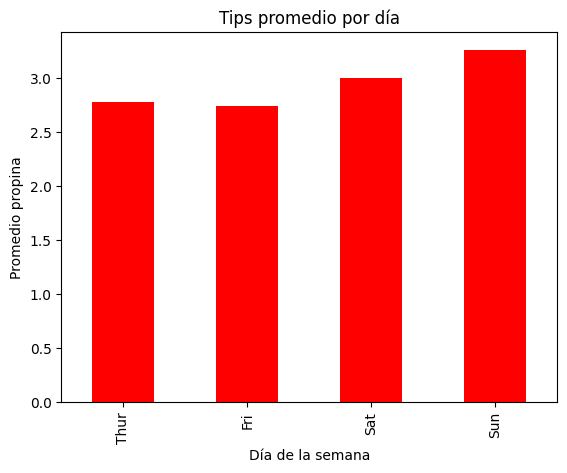

In [7]:
ax = tips_per_day.plot.bar(color='red', title='Tips promedio por día')
ax.set_xlabel('Día de la semana')
ax.set_ylabel('Promedio propina')

In [8]:
MH_por_dia = tips_df.groupby(['day', 'sex'])['tip'].count()

MH_por_dia

day   sex   
Thur  Male      30
      Female    32
Fri   Male      10
      Female     9
Sat   Male      59
      Female    28
Sun   Male      58
      Female    18
Name: tip, dtype: int64

Text(0, 0.5, 'Cantidad de mesas')

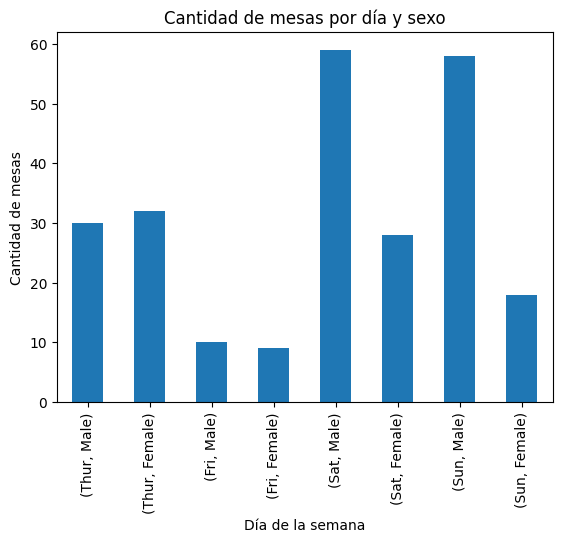

In [9]:
ax = MH_por_dia.plot.bar(stacked=True, title='Cantidad de mesas por día y sexo')
ax.set_xlabel('Día de la semana')
ax.set_ylabel('Cantidad de mesas')

In [10]:
wide_MH_por_dia = MH_por_dia.unstack(level=-1)
wide_MH_por_dia

sex,Male,Female
day,,
Thur,30,32
Fri,10,9
Sat,59,28
Sun,58,18


Text(0, 0.5, 'Cantidad de mesas')

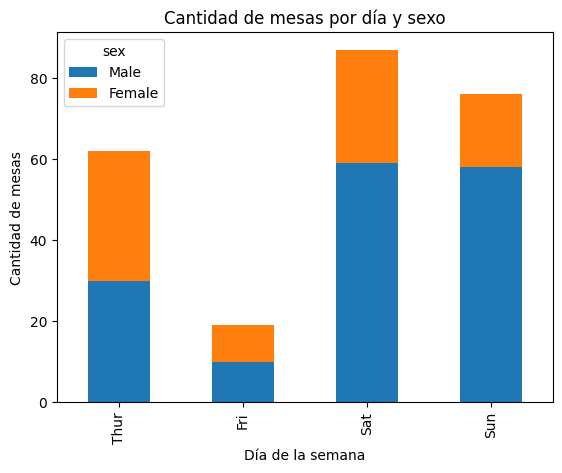

In [11]:
ax = wide_MH_por_dia.plot.bar(stacked=True, title='Cantidad de mesas por día y sexo')
ax.set_xlabel('Día de la semana')
ax.set_ylabel('Cantidad de mesas')

# Gráfico de puntos

In [13]:
fmri_df = sns.load_dataset('fmri')
fmri_df

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


In [15]:
subject13 = fmri_df[(fmri_df['subject'] == 's13') & (fmri_df['event'] == 'cue') & (fmri_df['region'] == 'frontal')]
subject13

,subject,timepoint,event,region,signal
605,s13,5,cue,frontal,0.056731
625,s13,0,cue,frontal,-0.012576
637,s13,4,cue,frontal,0.058704
651,s13,3,cue,frontal,0.034135
659,s13,6,cue,frontal,0.022420
680,s13,17,cue,frontal,-0.004190
708,s13,18,cue,frontal,-0.012163
730,s13,14,cue,frontal,-0.005701
770,s13,15,cue,frontal,-0.003053
784,s13,16,cue,frontal,-0.002522


In [16]:
subject13 = subject13.sort_values('timepoint')
subject13

,subject,timepoint,event,region,signal
625,s13,0,cue,frontal,-0.012576
995,s13,1,cue,frontal,-0.010346
981,s13,2,cue,frontal,0.004396
651,s13,3,cue,frontal,0.034135
637,s13,4,cue,frontal,0.058704
605,s13,5,cue,frontal,0.056731
659,s13,6,cue,frontal,0.022420
1060,s13,7,cue,frontal,-0.029130
1029,s13,8,cue,frontal,-0.070991
1016,s13,9,cue,frontal,-0.082955


### Matplotlib

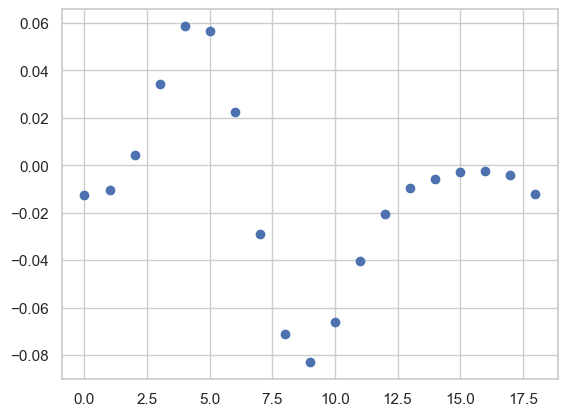

In [17]:
# Graficamos la señal en 19 puntos en el tiempo para el usuario s13
sns.set()
sns.set_style('whitegrid')

plt.plot(subject13['timepoint'], subject13['signal'], marker='o', linestyle='')

### Seaborn

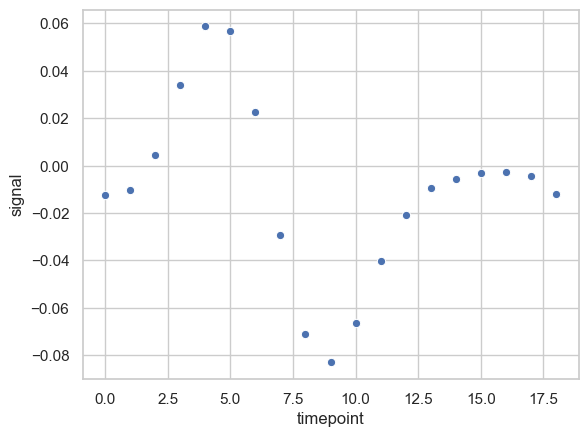

In [18]:
ax = sns.lineplot(x='timepoint', y='signal', data=subject13, linewidth=0, marker='o')

### Mostramos barras de error

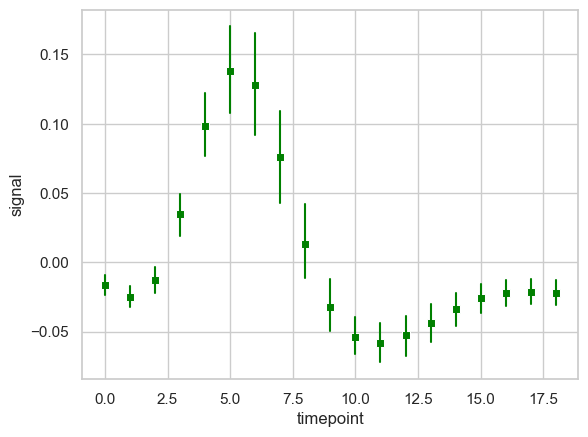

In [19]:
# Usando todos los datos del df

ax = sns.lineplot(
    x='timepoint', 
    y='signal', 
    data=fmri_df, 
    color='green',
    linewidth=0, 
    marker='s',
    err_style='bars')

### Error con bandas

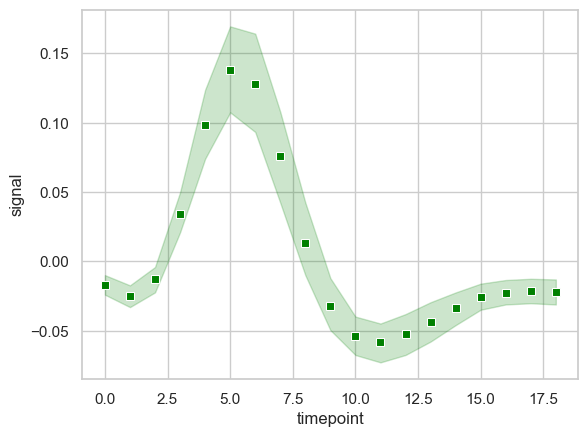

In [23]:
# Usando todos los datos del df

ax = sns.lineplot(
    x='timepoint', 
    y='signal', 
    data=fmri_df, 
    color='green',
    linewidth=0, 
    marker='s',
    err_style='band')

### Mostrar los datos uniendo los puntos

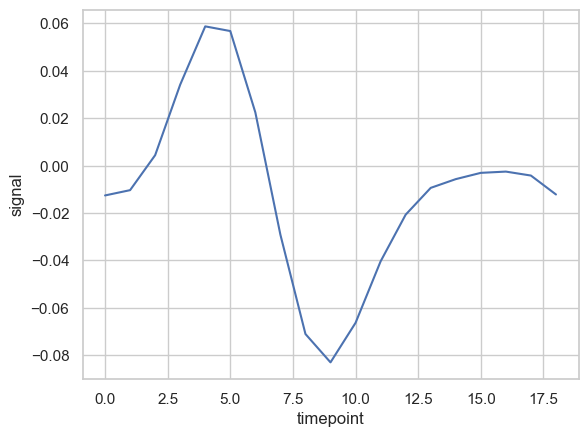

In [21]:
ax = sns.lineplot(x='timepoint', y='signal', data=subject13)

# Gráfico de dispersión

### Matplotlib

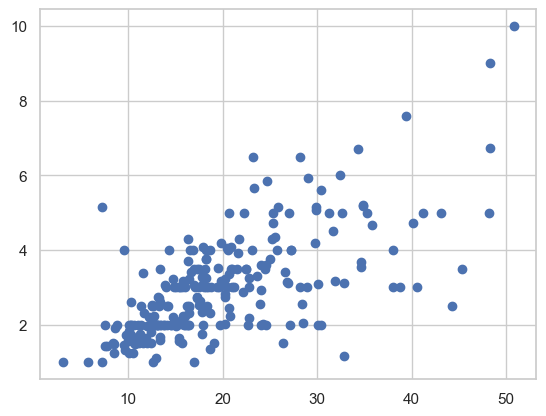

In [24]:
plt.scatter(tips_df['total_bill'], tips_df['tip'])

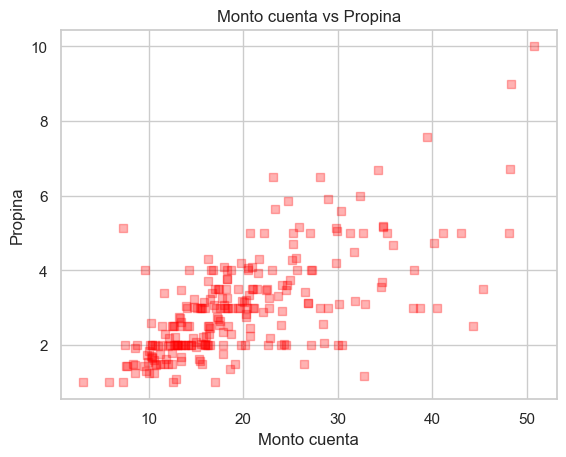

In [28]:
plt.scatter(
    tips_df['total_bill'], 
    tips_df['tip'],
    color='red',
    marker='s',
    alpha=0.3
)
plt.title('Monto cuenta vs Propina')
plt.xlabel('Monto cuenta')
plt.ylabel('Propina')
plt.show()

### Seaborn

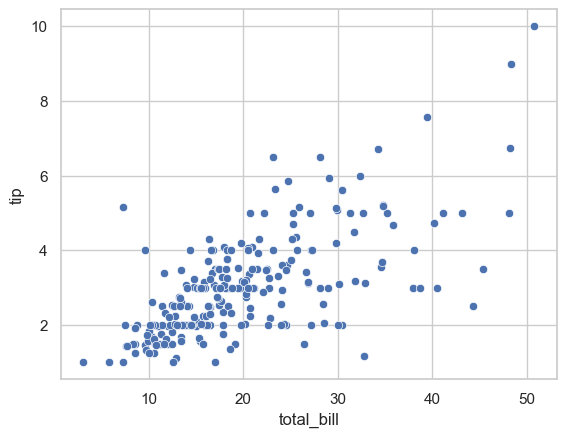

In [29]:
ax = sns.scatterplot(x='total_bill', y='tip', data=tips_df)

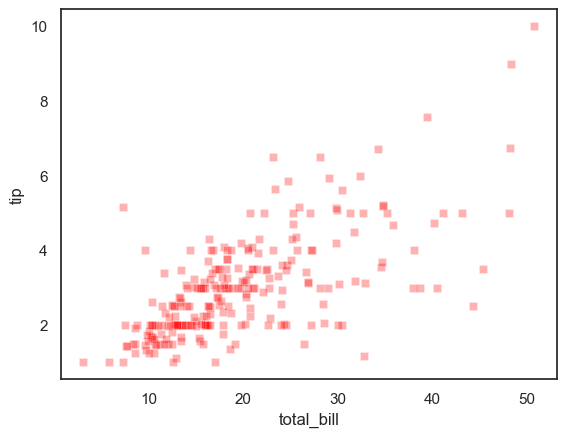

In [32]:
sns.set()
sns.set_style('white')

ax = sns.scatterplot(x='total_bill', 
                     y='tip', 
                     data=tips_df,
                     color='red',
                     marker='s',
                     alpha=.3
                )

# Gráfico de burbujas

In [36]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [33]:
smoker_num = tips_df['smoker'].astype('category').cat.codes
time_num = tips_df['time'].astype('category').cat.codes

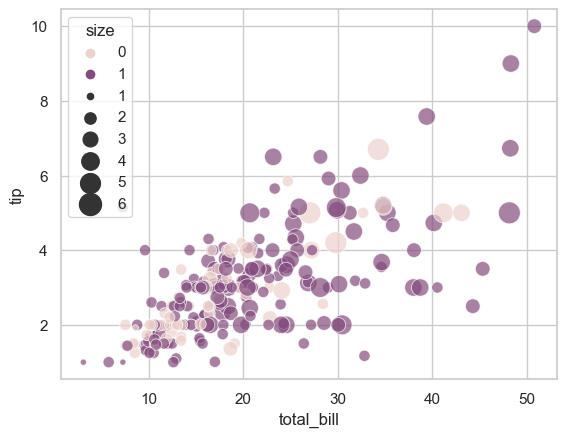

In [34]:
sns.set_style('whitegrid')

ax = sns.scatterplot(
    x='total_bill',
    y='tip',
    hue=time_num,
    size='size',
    sizes=(20, 250),
    hue_norm=(0, 1.5),
    alpha=0.7,
    legend='full',
    data=tips_df
)


# Gráficos de flujo

### Usamos la librería `altair`

In [38]:
!pip3 install altair vega_datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.8/210.8 kB 3.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [39]:
import altair as alt

In [40]:
alt.renderers.enable('default')
# Si el gráfico no funciona, probar con
# alt.renderers.enable('notebook')

RendererRegistry.enable('default')